In [ ]:
from zipfile import ZipFile

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip '/content/gdrive/MyDrive/Animal_Dataset.zip'

Archive:  /content/gdrive/MyDrive/Animal_Dataset.zip
replace dataset/Testing/bears/k4 (100).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [ ]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 26s 161ms/step - loss: 1.4169 - accuracy: 0.4483 - val_loss: 0.8262 - val_accuracy: 0.6933
Epoch 2/10
155/155 [==============================] - 23s 147ms/step - loss: 0.7440 - accuracy: 0.7407 - val_loss: 0.6099 - val_accuracy: 0.7331
Epoch 3/10
155/155 [==============================] - 23s 149ms/step - loss: 0.4491 - accuracy: 0.8562 - val_loss: 0.2174 - val_accuracy: 0.9509
Epoch 4/10
155/155 [==============================] - 23s 150ms/step - loss: 0.2644 - accuracy: 0.9200 - val_loss: 0.2966 - val_accuracy: 0.8865
Epoch 5/10
155/155 [==============================] - 23s 147ms/step - loss: 0.1621 - accuracy: 0.9548 - val_loss: 0.0680 - val_accuracy: 0.9877
Epoch 6/10
155/155 [==============================] - 24s 156ms/step - loss: 0.0966 - accuracy: 0.9733 - val_loss: 0.0547 - val_accuracy: 0.9908
Epoch 7/10
155/155 [==============================] - 25s 160ms/step - loss: 0.0755 - accuracy: 0.9774 - val_loss: 0.0604 - val_ac

In [ ]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/gdrive/MyDrive/crow.jpeg',target_size=(120,120))

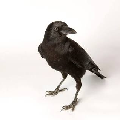

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [252., 247., 244.],
        [251., 246., 243.],
        [251., 246., 243.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [252., 247., 244.],
        [251., 246., 243.],
        [251., 246., 243.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [252., 247., 244.],
        [251., 246., 243.],
        [251., 246., 243.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 253., 251.],
        [254., 253., 251.],
        [254., 253., 251.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 254., 252.],
        [254., 253., 251.],
        [254., 253., 251.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [252., 247., 244.],
         [251., 246., 243.],
         [251., 246., 243.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [252., 247., 244.],
         [251., 246., 243.],
         [251., 246., 243.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [252., 247., 244.],
         [251., 246., 243.],
         [251., 246., 243.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 253., 251.],
         [254., 253., 251.],
         [254., 253., 251.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 254., 252.],
         [254., 253., 251.],
         [254., 253., 251.]],

        [[255., 255., 255.],
       

In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 109ms/step


3